### *一、日期和时间数据类型及工具*  
![](https://camo.githubusercontent.com/a4ccfe1623c56eb9a6e7c1662eac51c5f54916472721066c3fe57c5c82b2fb68/687474703a2f2f75706c6f61642d696d616765732e6a69616e7368752e696f2f75706c6f61645f696d616765732f373137383639312d346166323631613330356137306165622e706e673f696d6167654d6f6772322f6175746f2d6f7269656e742f7374726970253743696d61676556696577322f322f772f31323430)


!(https://[camo.githubusercontent.com/a4ccfe1623c56eb9a6e7](https://github.com/jaling9/python_for_data_analysis_2nd_chinese_version/blob/master/%E7%AC%AC11%E7%AB%A0%20%E6%97%B6%E9%97%B4%E5%BA%8F%E5%88%97.md#118-%E6%80%BB%E7%BB%93)

In [84]:
from datetime import datetime
now = datetime.now()
now

datetime.datetime(2022, 9, 1, 4, 2, 36, 138923)

In [85]:
now.year,now.month,now.day

(2022, 9, 1)

In [86]:
delta = datetime(2011,1,7)-datetime(2008,6,24,8,15)
delta

datetime.timedelta(days=926, seconds=56700)

In [87]:
delta.days

926

In [88]:
delta.seconds

56700

In [89]:
from datetime import timedelta
start  = datetime(2011,1,7)
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

#### *1.1字符串和datetime的相互转换*  
!["datetime格式定义"](https://camo.githubusercontent.com/6fe4b70a2bce293aff0caf0e644fd838103e62ce8e13caf6b5db5d5a7ca36736/687474703a2f2f75706c6f61642d696d616765732e6a69616e7368752e696f2f75706c6f61645f696d616765732f373137383639312d646530313831653166366234356561662e706e673f696d6167654d6f6772322f6175746f2d6f7269656e742f7374726970253743696d61676556696577322f322f772f31323430)

In [7]:
stamp = datetime(2011, 1, 3)
str(stamp)

'2011-01-03 00:00:00'

In [8]:
stamp.strftime("%Y-%m-%d")

'2011-01-03'

In [9]:
stamp.strftime("%Y年%m月%d日")

'2011年01月03日'

In [10]:
value = '2011-01-03'
datetime.strptime(value,'%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [11]:
datestrs = ['7/6/2011', '8/6/2011']
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [12]:
# 第三方包中的parser.parse方法
# dateutil可以解析几乎所有人类能够理解的日期表示形式：
from dateutil.parser import parse
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [13]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [14]:
# 日出现在月的前面
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [15]:
import pandas as pd
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [16]:
pd.to_datetime(datestrs + [None])

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

### *二、时间序列基础*

In [17]:
# pandas最基本的时间序列类型就是以时间戳
# (通常以Python字符串或datatime对象表示）为索引的Series
from datetime import datetime
import numpy as np
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
        datetime(2011, 1, 7), datetime(2011, 1, 8),
        datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = pd.Series(np.random.randn(6), index=dates)
ts

2011-01-02    1.247966
2011-01-05   -0.924567
2011-01-07   -0.858545
2011-01-08    1.996244
2011-01-10   -1.696130
2011-01-12    1.351498
dtype: float64

In [18]:
ts[::2] + ts # ts[::2] 是每隔两个取一个

2011-01-02    2.495931
2011-01-05         NaN
2011-01-07   -1.717091
2011-01-08         NaN
2011-01-10   -3.392260
2011-01-12         NaN
dtype: float64

#### *2.1 索引、选取、子集构造*

In [19]:
ts[ts.index[2]]

-0.8585454631463574

In [20]:
ts['1/10/2011']

-1.6961301413699132

In [21]:
# datetime对象也可以进行切片：
ts[datetime(2011, 1, 7):]

2011-01-07   -0.858545
2011-01-08    1.996244
2011-01-10   -1.696130
2011-01-12    1.351498
dtype: float64

In [22]:
# 也可以用不存在于该时间序列中的时间戳对其进行切片（即范围查询）
ts['1/6/2011':'1/11/2011']

2011-01-07   -0.858545
2011-01-08    1.996244
2011-01-10   -1.696130
dtype: float64

In [23]:
longer_ts = pd.Series(np.random.randn(1000),
                       index=pd.date_range('1/1/2000', periods=1000))
longer_ts    

2000-01-01    0.800590
2000-01-02   -1.067263
2000-01-03   -1.629673
2000-01-04    0.794627
2000-01-05   -0.008414
                ...   
2002-09-22    1.500487
2002-09-23   -2.263124
2002-09-24   -0.800340
2002-09-25   -0.248569
2002-09-26   -1.500017
Freq: D, Length: 1000, dtype: float64

In [24]:
# 对于较长的时间序列，只需传入“年”或“年月”即可轻松选取数据的切片：
longer_ts['2001']

2001-01-01    0.633223
2001-01-02   -0.245365
2001-01-03    0.086011
2001-01-04   -0.587427
2001-01-05    0.327624
                ...   
2001-12-27    0.712153
2001-12-28   -0.138897
2001-12-29    2.129195
2001-12-30   -0.179643
2001-12-31    1.074412
Freq: D, Length: 365, dtype: float64

#### *2.2 带有重复索引的时间序列*

In [25]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                         '1/2/2000', '1/3/2000'])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [26]:
dup_ts['1/2/2000']  # duplicated

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

In [27]:
# 设你想要对具有非唯一时间戳的数据进行聚合
grouped = dup_ts.groupby(level=0) 
grouped.mean()

2000-01-01    0.0
2000-01-02    2.0
2000-01-03    4.0
dtype: float64

### *三、日期范围、频率以及移动*

In [28]:
ts

2011-01-02    1.247966
2011-01-05   -0.924567
2011-01-07   -0.858545
2011-01-08    1.996244
2011-01-10   -1.696130
2011-01-12    1.351498
dtype: float64

In [29]:
resampler = ts.resample('D')
resampler

#### *3.1 生成日期范围*

In [30]:
index = pd.date_range('2012-04-01', '2012-06-01')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [31]:
pd.date_range(start='2012-04-01', periods=20) # periods-->时间段

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [32]:
pd.date_range('2000-01-01', '2000-12-01', freq='BM') # "BM"频率（表示business end of month

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

【日期频率说明表】

![](https://camo.githubusercontent.com/4c6878be71f09fbffeb32bd94a336e59794330ddb740daf26d2385bb526f2807/687474703a2f2f75706c6f61642d696d616765732e6a69616e7368752e696f2f75706c6f61645f696d616765732f373137383639312d633836313464646264313037393363612e706e673f696d6167654d6f6772322f6175746f2d6f7269656e742f7374726970253743696d61676556696577322f322f772f31323430)
![](https://camo.githubusercontent.com/d188f192c286118142afc7f6194d6ce496edd0a79d39b1eb0eeff9a99e8c8cb0/687474703a2f2f75706c6f61642d696d616765732e6a69616e7368752e696f2f75706c6f61645f696d616765732f373137383639312d386461343662613936353434623037312e706e673f696d6167654d6f6772322f6175746f2d6f7269656e742f7374726970253743696d61676556696577322f322f772f31323430)
![](https://camo.githubusercontent.com/f46d5fc08f9edea0c7d2434d67c22b3a5f003b086a9f3a887cb031a675213509/687474703a2f2f75706c6f61642d696d616765732e6a69616e7368752e696f2f75706c6f61645f696d616765732f373137383639312d336361343130363039313935656463342e706e673f696d6167654d6f6772322f6175746f2d6f7269656e742f7374726970253743696d61676556696577322f322f772f31323430)

In [ ]:
"""
DateOffset objects
In the preceding examples, we created DatetimeIndex objects at various frequencies by passing in frequency strings like ‘M’, ‘W’, and ‘BM to the freq keyword. Under the hood, these frequency strings are being translated into an instance of pandas DateOffset, which represents a regular frequency increment. Specific offset logic like “month”, “business day”, or “one hour” is represented in its various subclasses.

Class name	Description
DateOffset	Generic offset class, defaults to 1 calendar day
BDay	    business day (weekday)
Week	    one week, optionally anchored on a day of the week
WeekOfMonth	the x-th day of the y-th week of each month
MonthEnd	calendar month end
MonthBegin	calendar month begin
BMonthEnd	business month end
BMonthBegin	business month begin
QuarterEnd	calendar quarter end
QuarterBegin	calendar quarter begin
BQuarterEnd	business quarter end
BQuarterBegin	business quarter begin
YearEnd	calendar year end
YearBegin	calendar year begin
BYearEnd	business year end
BYearBegin	business year begin
Hour	    one hour
Minute	    one minute
Second	    one second
Milli	    one millisecond
Micro	    one microsecond
--------------------------------------------------------------
Alias	Description
B	    business day frequency
D	    calendar day frequency
W	    weekly frequency
M	    month end frequency
BM	    business month end frequency
MS	    month start frequency
BMS	    business month start frequency
Q	    quarter end frequency
BQ	    business quarter endfrequency
QS	    quarter start frequency
BQS	    business quarter start frequency
A	    year end frequency
BA	    business year end frequency
AS	    year start frequency
BAS	    business year start frequency
H	    hourly frequency
T	    minutely frequency
S	    secondly frequency
L	    milliseonds
U	    microseconds
-------------------------------------------------------------
Alias	    Description
W-SUN	    weekly frequency (sundays). Same as ‘W’
W-MON	    weekly frequency (mondays)
W-TUE	    weekly frequency (tuesdays)
W-WED	    weekly frequency (wednesdays)
W-THU	    weekly frequency (thursdays)
W-FRI	    weekly frequency (fridays)
W-SAT	    weekly frequency (saturdays)
(B)Q(S)-DEC	quarterly frequency, year ends in December. Same as ‘Q’
(B)Q(S)-JAN	quarterly frequency, year ends in January
(B)Q(S)-FEB	quarterly frequency, year ends in February
(B)Q(S)-MAR	quarterly frequency, year ends in March
(B)Q(S)-APR	quarterly frequency, year ends in April
(B)Q(S)-MAY	quarterly frequency, year ends in May
(B)Q(S)-JUN	quarterly frequency, year ends in June
(B)Q(S)-JUL	quarterly frequency, year ends in July
(B)Q(S)-AUG	quarterly frequency, year ends in August
(B)Q(S)-SEP	quarterly frequency, year ends in September
(B)Q(S)-OCT	quarterly frequency, year ends in October
(B)Q(S)-NOV	quarterly frequency, year ends in November
(B)A(S)-DEC	annual frequency, anchored end of December. Same as ‘A’
(B)A(S)-JAN	annual frequency, anchored end of January
(B)A(S)-FEB	annual frequency, anchored end of February
(B)A(S)-MAR	annual frequency, anchored end of March
(B)A(S)-APR	annual frequency, anchored end of April
(B)A(S)-MAY	annual frequency, anchored end of May
(B)A(S)-JUN	annual frequency, anchored end of June
(B)A(S)-JUL	annual frequency, anchored end of July
(B)A(S)-AUG	annual frequency, anchored end of August
(B)A(S)-SEP	annual frequency, anchored end of September
(B)A(S)-OCT	annual frequency, anchored end of October
(B)A(S)-NOV	annual frequency, anchored end of November
-----------------------------------------------------------------
Legacy Time Rule	Offset Alias
WEEKDAY	B
EOM	    BM
W@MON	W-MON
W@TUE	W-TUE
W@WED	W-WED
W@THU	W-THU
W@FRI	W-FRI
W@SAT	W-SAT
W@SUN	W-SUN
Q@JAN	BQ-JAN
Q@FEB	BQ-FEB
Q@MAR	BQ-MAR
A@JAN	BA-JAN
A@FEB	BA-FEB
A@MAR	BA-MAR
A@APR	BA-APR
A@MAY	BA-MAY
A@JUN	BA-JUN
A@JUL	BA-JUL
A@AUG	BA-AUG
A@SEP	BA-SEP
A@OCT	BA-OCT
A@NOV	BA-NOV
A@DEC	BA-DEC
min	T
ms	L
us: “U”	 
"""

In [33]:
pd.date_range('2012-05-02 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [34]:
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

#### *3.2 频率和日期偏移量*

In [35]:
from pandas.tseries.offsets import Hour, Minute
hour = Hour()
hour

<Hour>

In [36]:
four_hours = Hour(4)
four_hours

<4 * Hours>

In [37]:
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [38]:
pd.date_range('2000-01-01', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

#### *3.3 WOM日期*

In [39]:
# WOM（Week Of Month）是一种非常实用的频率类，它以WOM开头。
# 它使你能获得诸如“每月第3个星期五”之类的日期：
rng = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

#### *3.4 移动（超前和滞后）数据*

In [40]:
ts = pd.Series(np.random.randn(4),
             index=pd.date_range('1/1/2000', periods=4, freq='M'))

ts

2000-01-31    0.309445
2000-02-29    0.411688
2000-03-31   -1.094780
2000-04-30   -0.061614
Freq: M, dtype: float64

In [41]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    0.309445
2000-04-30    0.411688
Freq: M, dtype: float64

In [42]:
ts.shift(2, freq='M')

2000-03-31    0.309445
2000-04-30    0.411688
2000-05-31   -1.094780
2000-06-30   -0.061614
Freq: M, dtype: float64

#### *3.5 通过偏移量对日期进行位移*

In [43]:
from pandas.tseries.offsets import Day, MonthEnd
now = datetime(2011, 11, 17)
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [44]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [45]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [46]:
offset = MonthEnd()
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [47]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [48]:
ts = pd.Series(np.random.randn(20),
    index=pd.date_range('1/15/2000', periods=20, freq='4d'))
ts    

2000-01-15   -0.898079
2000-01-19    0.418613
2000-01-23   -0.027204
2000-01-27   -0.646018
2000-01-31   -0.575322
2000-02-04    0.743394
2000-02-08   -0.525013
2000-02-12   -1.429528
2000-02-16   -0.960326
2000-02-20    0.296981
2000-02-24    0.640401
2000-02-28   -0.993267
2000-03-03    0.197453
2000-03-07    1.045842
2000-03-11   -0.318734
2000-03-15    0.051568
2000-03-19   -0.640207
2000-03-23    0.543802
2000-03-27   -1.360973
2000-03-31    0.273694
Freq: 4D, dtype: float64

In [49]:
ts.groupby(offset.rollforward).mean()

2000-01-31   -0.345602
2000-02-29   -0.318194
2000-03-31   -0.025944
dtype: float64

In [50]:
ts.resample('M').mean()

2000-01-31   -0.345602
2000-02-29   -0.318194
2000-03-31   -0.025944
Freq: M, dtype: float64

### *四、时区处理*

In [51]:
import pytz
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [52]:
tz = pytz.timezone('America/New_York')
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

#### *4.1 时区本地化和转换*

In [53]:
# 默认情况下，pandas中的时间序列是单纯（naive）的时区。看看下面这个时间序列：
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-09 09:30:00   -0.992164
2012-03-10 09:30:00    0.805313
2012-03-11 09:30:00    0.049895
2012-03-12 09:30:00   -0.757326
2012-03-13 09:30:00    0.319401
2012-03-14 09:30:00   -1.232725
Freq: D, dtype: float64

In [54]:
print(ts.index.tz)

None


In [55]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [56]:
ts

2012-03-09 09:30:00   -0.992164
2012-03-10 09:30:00    0.805313
2012-03-11 09:30:00    0.049895
2012-03-12 09:30:00   -0.757326
2012-03-13 09:30:00    0.319401
2012-03-14 09:30:00   -1.232725
Freq: D, dtype: float64

In [57]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-09 09:30:00+00:00   -0.992164
2012-03-10 09:30:00+00:00    0.805313
2012-03-11 09:30:00+00:00    0.049895
2012-03-12 09:30:00+00:00   -0.757326
2012-03-13 09:30:00+00:00    0.319401
2012-03-14 09:30:00+00:00   -1.232725
Freq: D, dtype: float64

In [58]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [59]:
# 一旦时间序列被本地化到某个特定时区，就可以用tz_convert将其转换到别的时区了：
ts_utc.tz_convert('America/New_York')

2012-03-09 04:30:00-05:00   -0.992164
2012-03-10 04:30:00-05:00    0.805313
2012-03-11 05:30:00-04:00    0.049895
2012-03-12 05:30:00-04:00   -0.757326
2012-03-13 05:30:00-04:00    0.319401
2012-03-14 05:30:00-04:00   -1.232725
Freq: D, dtype: float64

In [60]:
ts_eastern = ts.tz_localize('America/New_York')
ts_eastern.tz_convert('UTC')

2012-03-09 14:30:00+00:00   -0.992164
2012-03-10 14:30:00+00:00    0.805313
2012-03-11 13:30:00+00:00    0.049895
2012-03-12 13:30:00+00:00   -0.757326
2012-03-13 13:30:00+00:00    0.319401
2012-03-14 13:30:00+00:00   -1.232725
dtype: float64

In [61]:
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00   -0.992164
2012-03-10 15:30:00+01:00    0.805313
2012-03-11 14:30:00+01:00    0.049895
2012-03-12 14:30:00+01:00   -0.757326
2012-03-13 14:30:00+01:00    0.319401
2012-03-14 14:30:00+01:00   -1.232725
dtype: float64

In [62]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq=None)

#### *4.2 操作时区意识型Timestamp对象*

In [63]:
# 跟时间序列和日期范围差不多，独立的Timestamp对象也能被从单纯型（naive）
# 本地化为时区意识型（time zone-aware），并从一个时区转换到另一个时区：
stamp = pd.Timestamp('2011-03-12 04:00')
stamp_utc = stamp.tz_localize('utc')
stamp_utc.tz_convert('America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [64]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [65]:
stamp_utc.value

1299902400000000000

In [66]:
stamp_utc.tz_convert('America/New_York').value

1299902400000000000

#### *4.3 同时区之间的运算*

In [67]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts1 = ts[:7].tz_localize('Europe/London')
ts2 = ts1[2:].tz_convert('Europe/Moscow')
ts

2012-03-07 09:30:00    1.200535
2012-03-08 09:30:00   -0.980534
2012-03-09 09:30:00   -0.817876
2012-03-12 09:30:00    0.423303
2012-03-13 09:30:00    0.689695
2012-03-14 09:30:00   -0.348001
2012-03-15 09:30:00   -0.935042
2012-03-16 09:30:00   -0.921287
2012-03-19 09:30:00   -0.979512
2012-03-20 09:30:00    0.711289
Freq: B, dtype: float64

In [68]:
ts1

2012-03-07 09:30:00+00:00    1.200535
2012-03-08 09:30:00+00:00   -0.980534
2012-03-09 09:30:00+00:00   -0.817876
2012-03-12 09:30:00+00:00    0.423303
2012-03-13 09:30:00+00:00    0.689695
2012-03-14 09:30:00+00:00   -0.348001
2012-03-15 09:30:00+00:00   -0.935042
dtype: float64

In [69]:
ts2

2012-03-09 13:30:00+04:00   -0.817876
2012-03-12 13:30:00+04:00    0.423303
2012-03-13 13:30:00+04:00    0.689695
2012-03-14 13:30:00+04:00   -0.348001
2012-03-15 13:30:00+04:00   -0.935042
dtype: float64

In [70]:
result = ts1 + ts2
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

### *五、时期及其算术运算*  

In [71]:
"""
时期（period）表示的是时间区间，比如数日、数月、数季、数年等。
Period类所表示的就是这种数据类型，其构造函数需要用到一个字符串或整数，以及表11-4中的频率：
"""
p = pd.Period(2007, freq='A-DEC')
p # Period对象表示的是从2007年1月1日到2007年12月31日之间的整段时间

Period('2007', 'A-DEC')

In [72]:
p + 5

Period('2012', 'A-DEC')

In [73]:
# 如果两个Period对象拥有相同的频率，则它们的差就是它们之间的单位数量
pd.Period('2014', freq='A-DEC') - p

<7 * YearEnds: month=12>

In [74]:
"""
period_range函数可用于创建规则的时期范围：
"""
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]')

In [75]:
pd.Series(np.random.randn(6), index=rng)

2000-01   -1.695061
2000-02    0.672975
2000-03    0.209915
2000-04   -0.647811
2000-05    0.047767
2000-06   -0.471093
Freq: M, dtype: float64

In [76]:
values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]')

In [77]:
pd.Series(np.random.randn(3), index=index)

2001Q3   -0.971521
2002Q2   -0.045710
2003Q1    0.339002
Freq: Q-DEC, dtype: float64

#### *5.1 时期的频率转换*

In [79]:
p = pd.Period('2007', freq='A-DEC')
p

Period('2007', 'A-DEC')

In [85]:
print(p.asfreq('M', how='start'))
print(p.asfreq('M', how='end'))

2007-01
2007-12


In [86]:
# 可以将Period('2007','A-DEC')看做一个被划分为多个月度时期的时间段中的游标
p = pd.Period('2007', freq='A-JUN')
p

Period('2007', 'A-JUN')

In [87]:
p.asfreq('M', 'start')

Period('2006-07', 'M')

In [88]:
p.asfreq('M', 'end')

Period('2007-06', 'M')

In [89]:
# 在将高频率转换为低频率时，超时期（superperiod）是由子时期（subperiod）所属的位置决定的。
# 例如，在A-JUN频率中，月份“2007年8月”实际上是属于周期“2008年”的
p = pd.Period('Aug-2007', 'M')
p

Period('2007-08', 'M')

In [90]:
rng = pd.period_range('2006', '2009', freq='A-DEC')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2006   -1.589482
2007    1.537636
2008    1.494986
2009   -1.596383
Freq: A-DEC, dtype: float64

In [91]:
ts.asfreq('M', how='start')

2006-01   -1.589482
2007-01    1.537636
2008-01    1.494986
2009-01   -1.596383
Freq: M, dtype: float64

In [92]:
ts.asfreq('B', how='end')

2006-12-29   -1.589482
2007-12-31    1.537636
2008-12-31    1.494986
2009-12-31   -1.596383
Freq: B, dtype: float64

#### *5.2 按季度计算的时期频率*  
![](https://camo.githubusercontent.com/9824917a9cc8713d348d2b997601d5e55d4c5af194187c3519df63b32c96e8bc/687474703a2f2f75706c6f61642d696d616765732e6a69616e7368752e696f2f75706c6f61645f696d616765732f373137383639312d643230313230306430653635363736662e706e673f696d6167654d6f6772322f6175746f2d6f7269656e742f7374726970253743696d61676556696577322f322f772f31323430)
![](https://camo.githubusercontent.com/3c8aa6170db237a2fffefb12aa76c81fb9c4c18d7507d2860c0f54895a54685d/687474703a2f2f75706c6f61642d696d616765732e6a69616e7368752e696f2f75706c6f61645f696d616765732f373137383639312d653265316435326339373636663666662e706e673f696d6167654d6f6772322f6175746f2d6f7269656e742f7374726970253743696d61676556696577322f322f772f31323430)

In [93]:
p = pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [94]:
p.asfreq('D', 'start')

Period('2011-11-01', 'D')

In [95]:
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

In [101]:
# Period之间的算术运算会非常简单。例如，要获取该季度倒数第二个工作日下午4点的时间戳
p4pm = (p.asfreq('B', 'end') - 1).asfreq('min', 'start') + 16 * 60
p4pm

Period('2012-01-30 16:00', 'T')

In [ ]:
p4pm.to_timestamp()

In [103]:
# period_range可用于生成季度型范围。季度型范围的算术运算也跟上面是一样的：
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')
ts = pd.Series(np.arange(len(rng)), index=rng)
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int32

In [105]:
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
ts.index = new_rng.to_timestamp()
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int32

#### *5.3 将Timestamp转换为Period（及其反向过程）*

In [109]:
rng = pd.date_range('2000-01-01', periods=3, freq='M') # -->时间段
ts = pd.Series(np.random.randn(3), index=rng)
ts

2000-01-31    1.481477
2000-02-29   -0.642672
2000-03-31    1.412730
Freq: M, dtype: float64

In [111]:
pts = ts.to_period()
pts

2000-01    1.481477
2000-02   -0.642672
2000-03    1.412730
Freq: M, dtype: float64

In [112]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = pd.Series(np.random.randn(6), index=rng)
ts2

2000-01-29    0.529426
2000-01-30   -1.050481
2000-01-31   -0.341063
2000-02-01   -2.230153
2000-02-02    0.874740
2000-02-03    0.105202
Freq: D, dtype: float64

In [119]:
ts2.to_period('M')

2000-01    0.529426
2000-01   -1.050481
2000-01   -0.341063
2000-02   -2.230153
2000-02    0.874740
2000-02    0.105202
Freq: M, dtype: float64

In [120]:
# 要转换回时间戳，使用to_timestamp即可：
pts = ts2.to_period()
pts.to_timestamp(how='end')

2000-01-29 23:59:59.999999999    0.529426
2000-01-30 23:59:59.999999999   -1.050481
2000-01-31 23:59:59.999999999   -0.341063
2000-02-01 23:59:59.999999999   -2.230153
2000-02-02 23:59:59.999999999    0.874740
2000-02-03 23:59:59.999999999    0.105202
Freq: D, dtype: float64

#### *5.4 通过数组创建PeriodIndex*

In [122]:
# 固定频率的数据集通常会将时间信息分开存放在多个列中。
# 例如，在下面这个宏观经济数据集中，年度和季度就分别存放在不同的列中
data = pd.read_csv('examples/macrodata.csv')
data.sample(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
100,1984.0,1.0,6448.264,4239.2,921.763,644.635,4875.4,103.3,535.0,9.43,7.9,235.839,4.67,4.76
172,2002.0,1.0,11477.868,7957.3,1789.327,756.915,8611.6,179.3,1185.9,1.75,5.7,287.328,3.59,-1.84
136,1993.0,1.0,8432.485,5617.2,1054.979,762.901,6156.5,143.8,1047.6,2.92,7.2,259.414,2.79,0.13
105,1985.0,2.0,6797.344,4505.2,943.383,708.524,5172.7,107.7,589.1,7.17,7.3,238.466,2.61,4.56
115,1987.0,4.0,7458.022,4922.2,1021.980,795.467,5493.1,116.0,756.2,5.76,5.9,243.981,3.46,2.29


In [124]:
# 通过将这些数组以及一个频率传入PeriodIndex，就可以将它们合并成DataFrame的一个索引：
index = pd.PeriodIndex(year=data.year, quarter=data.quarter,
                       freq='Q-DEC')
index                 

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203)

In [126]:
data.index = index
data.index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203)

### *六、重采样及频率转换*

In [127]:
"""
重采样（resampling）指的是将时间序列从一个频率转换到另一个频率的处理过程。
将高频率数据聚合到低频率称为降采样（downsampling），
而将低频率数据转换到高频率则称为升采样（upsampling）。
并不是所有的重采样都能被划分到这两个大类中。
例如，将W-WED（每周三）转换为W-FRI既不是降采样也不是升采样。
pandas对象都带有一个resample方法，它是各种频率转换工作的主力函数。
resample有一个类似于groupby的API，调用resample可以分组数据，
然后会调用一个聚合函数：
"""
rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2000-01-01   -0.320639
2000-01-02   -0.691535
2000-01-03   -0.087959
2000-01-04    0.529498
2000-01-05    0.678011
                ...   
2000-04-05    0.788198
2000-04-06   -1.073135
2000-04-07   -1.592318
2000-04-08    0.976607
2000-04-09    0.266996
Freq: D, Length: 100, dtype: float64

In [128]:
ts.resample('M').mean()

2000-01-31   -0.164758
2000-02-29    0.058509
2000-03-31   -0.084816
2000-04-30   -0.242617
Freq: M, dtype: float64

In [130]:
ts.resample('M',kind='period').mean()

2000-01   -0.164758
2000-02    0.058509
2000-03   -0.084816
2000-04   -0.242617
Freq: M, dtype: float64

resample是一个灵活高效的方法，可用于处理非常大的时间序列:
![](https://camo.githubusercontent.com/ae9df481e4d017d2ce12de4596c823669bf6dcb0e35e04296651e180779f139d/68747470733a2f2f75706c6f61642d696d616765732e6a69616e7368752e696f2f75706c6f61645f696d616765732f373137383639312d623430613537303836633930346538332e706e673f696d6167654d6f6772322f6175746f2d6f7269656e742f7374726970253743696d61676556696577322f322f772f31323430)

#### *6.1 降采样*  
![](https://camo.githubusercontent.com/747888cd7d14998533542947af38379c46f5db187303c1ed96fa708abd811953/687474703a2f2f75706c6f61642d696d616765732e6a69616e7368752e696f2f75706c6f61645f696d616765732f373137383639312d376137376634373834346632656538632e706e673f696d6167654d6f6772322f6175746f2d6f7269656e742f7374726970253743696d61676556696577322f322f772f31323430)

In [131]:
"""
在用resample对数据进行降采样时，需要考虑两样东西：

各区间哪边是闭合的。
如何标记各个聚合面元，用区间的开头还是末尾
"""
rng = pd.date_range('2000-01-01', periods=12, freq='T')
ts = pd.Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [132]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [136]:
ts.resample('5min', closed='left').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int32

In [134]:
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int32

In [137]:
ts.resample('5min', closed='right', label='left').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [138]:
# 索引偏移
ts.resample('5min', closed='right',
            label='right', loffset='-1s').sum()

C:\Users\mjl\AppData\Local\Temp\ipykernel_9380\542427051.py:2: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  ts.resample('5min', closed='right',


1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int32

In [139]:
ts.resample('5min', closed='left',
            label='right', loffset='-1s').sum()

C:\Users\mjl\AppData\Local\Temp\ipykernel_9380\787538257.py:1: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  ts.resample('5min', closed='left',


2000-01-01 00:04:59    10
2000-01-01 00:09:59    35
2000-01-01 00:14:59    21
Freq: 5T, dtype: int32

#### *6.2 OHLC重采样*

In [140]:
"""
金融领域中有一种无所不在的时间序列聚合方式，
即计算各面元的四个值：第一个值（open，开盘）、
最后一个值（close，收盘）、最大值（high，最高）以及最小值（low，最低）。
传入how='ohlc'即可得到一个含有这四种聚合值的DataFrame。
整个过程很高效，只需一次扫描即可计算出结果
"""

ts.resample('5min').ohlc()


,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


#### *6.3 升采样和插值*

In [141]:
# 将数据从低频率转换到高频率
frame = pd.DataFrame(np.random.randn(2, 4),
                    index=pd.date_range('1/1/2000', periods=2,freq='W-WED'),
                    columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame                 

,Colorado,Texas,New York,Ohio
2000-01-05,1.332863,-1.279975,-1.413226,-0.780859
2000-01-12,-1.478268,-1.049650,1.325353,-1.235808


In [142]:
df_daily = frame.resample('D').asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,1.332863,-1.279975,-1.413226,-0.780859
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-1.478268,-1.049650,1.325353,-1.235808


In [144]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,1.332863,-1.279975,-1.413226,-0.780859
2000-01-06,1.332863,-1.279975,-1.413226,-0.780859
2000-01-07,1.332863,-1.279975,-1.413226,-0.780859
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-1.478268,-1.049650,1.325353,-1.235808


In [145]:
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,1.332863,-1.279975,-1.413226,-0.780859
2000-01-13,-1.478268,-1.049650,1.325353,-1.235808


#### *6.4 通过时期进行重采样*

In [158]:
frame = pd.DataFrame(np.random.randn(24, 4),
index=pd.period_range('1-2000', '12-2001',freq='M'),
columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame.sample(n=5,random_state=2022)

,Colorado,Texas,New York,Ohio
2000-05,-0.345986,-1.336534,0.136488,0.002274
2001-04,-0.979441,-1.509948,-0.335620,0.843241
2001-09,-0.447341,1.006731,-0.622695,1.031398
2000-03,0.137873,-1.905340,-2.009869,-0.883025
2000-08,-0.351906,0.901474,0.083254,0.056937


In [159]:
annual_frame = frame.resample('A-DEC').mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000,0.151019,-0.356309,-0.336562,-0.086860
2001,-0.170496,0.048388,-0.140108,-0.164686


In [160]:
# Q-DEC: Quarterly, year ending in December
annual_frame.resample('Q-DEC').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,0.151019,-0.356309,-0.336562,-0.086860
2000Q2,0.151019,-0.356309,-0.336562,-0.086860
2000Q3,0.151019,-0.356309,-0.336562,-0.086860
2000Q4,0.151019,-0.356309,-0.336562,-0.086860
2001Q1,-0.170496,0.048388,-0.140108,-0.164686
2001Q2,-0.170496,0.048388,-0.140108,-0.164686
2001Q3,-0.170496,0.048388,-0.140108,-0.164686
2001Q4,-0.170496,0.048388,-0.140108,-0.164686


In [161]:
annual_frame.resample('Q-DEC', convention='end').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.151019,-0.356309,-0.336562,-0.086860
2001Q1,0.151019,-0.356309,-0.336562,-0.086860
2001Q2,0.151019,-0.356309,-0.336562,-0.086860
2001Q3,0.151019,-0.356309,-0.336562,-0.086860
2001Q4,-0.170496,0.048388,-0.140108,-0.164686


In [162]:
"""
由于时期指的是时间区间，所以升采样和降采样的规则就比较严格：

在降采样中，目标频率必须是源频率的子时期（subperiod）。
在升采样中，目标频率必须是源频率的超时期（superperiod）。
如果不满足这些条件，就会引发异常。这主要影响的是按季、年、周计算的频率。
例如，由Q-MAR定义的时间区间只能升采样为A-MAR、A-JUN、A-SEP、A-DEC等：
"""
annual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.151019,-0.356309,-0.336562,-0.086860
2001Q1,0.151019,-0.356309,-0.336562,-0.086860
2001Q2,0.151019,-0.356309,-0.336562,-0.086860
2001Q3,0.151019,-0.356309,-0.336562,-0.086860
2001Q4,-0.170496,0.048388,-0.140108,-0.164686
2002Q1,-0.170496,0.048388,-0.140108,-0.164686
2002Q2,-0.170496,0.048388,-0.140108,-0.164686
2002Q3,-0.170496,0.048388,-0.140108,-0.164686


### *七、移动窗口函数*

In [203]:
"""
在移动窗口（可以带有指数衰减权数）上
计算的各种统计函数也是一类常见于时间序列的数组变换。
这样可以圆滑噪音数据或断裂数据。
我将它们称为移动窗口函数（moving window function），
其中还包括那些窗口不定长的函数（如指数加权移动平均）。
跟其他统计函数一样，移动窗口函数也会自动排除缺失值。
开始之前，我们加载一些时间序列数据，将其重采样为工作日频率：
"""
close_px_all = pd.read_csv('examples/stock_px_2.csv',
                          parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()    
close_px.sample(5)                 

,AAPL,MSFT,XOM
2006-11-22,90.31,27.23,65.77
2006-04-21,67.04,24.44,57.82
2006-05-15,67.79,20.92,55.43
2003-01-16,7.31,21.75,28.90
2006-03-03,67.72,24.24,54.25


<AxesSubplot:>

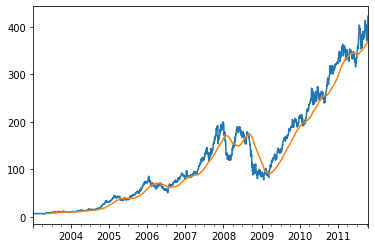

In [204]:
close_px.AAPL.plot()
#close_px.AAPL.rolling(2000).mean().plot()
close_px.AAPL.rolling(100).mean().plot()
#close_px.AAPL.rolling(365).mean().plot()

In [205]:
"""
表达式rolling(250)与groupby很像，但不是对其进行分组，
而是创建一个按照250天分组的滑动窗口对象。
然后，我们就得到了苹果公司股价的250天的移动窗口。

默认情况下，rolling函数需要窗口中所有的值为非NA值。
可以修改该行为以解决缺失数据的问题。
其实，在时间序列开始处尚不足窗口期的那些数据就是个特例
"""

appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()
appl_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

<AxesSubplot:>

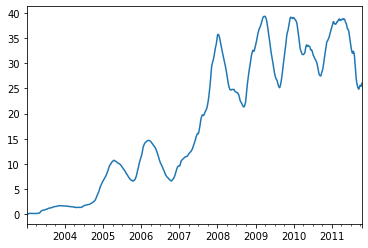

In [206]:
appl_std250.plot()

<AxesSubplot:>

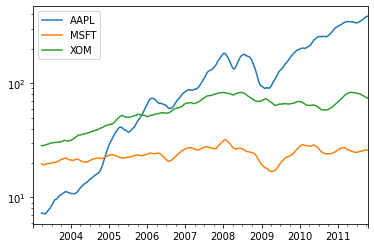

In [207]:
"""
要计算扩展窗口平均（expanding window mean），
可以使用expanding而不是rolling。
“扩展”意味着，从时间序列的起始处开始窗口，增加窗口直到它超过所有的序列。
apple_std250时间序列的扩展窗口平均如下所示
"""

expanding_mean = appl_std250.expanding().mean()
close_px.rolling(60).mean().plot(logy=True)

In [208]:
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


#### *7.1 指数加权函数*

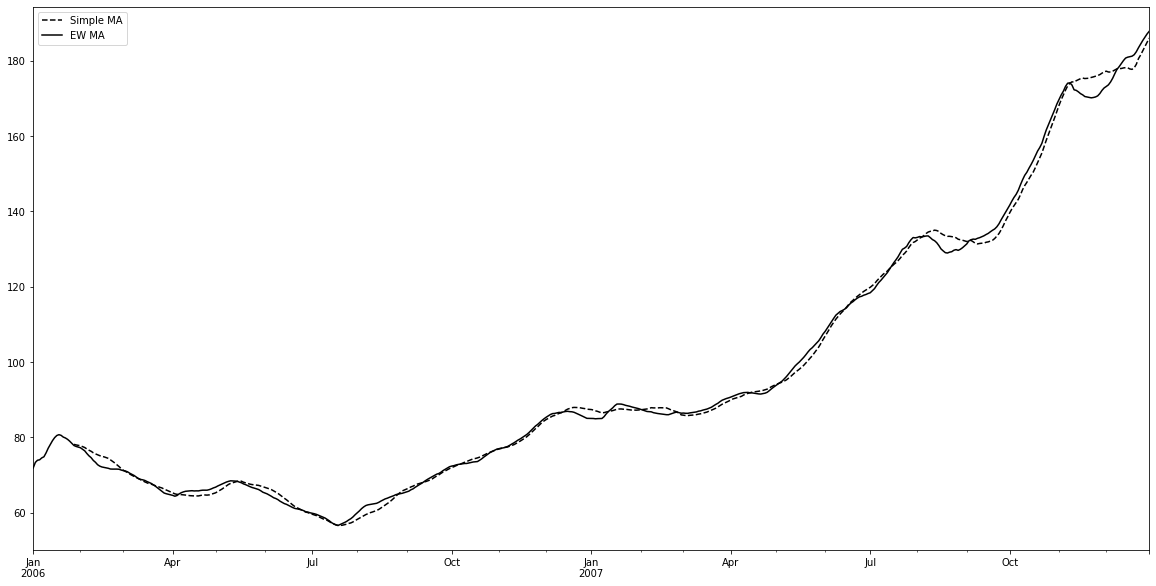

In [209]:
"""
另一种使用固定大小窗口及相等权数观测值的办法是，
定义一个衰减因子（decay factor）常量，以便使近期的观测值拥有更大的权数。
衰减因子的定义方式有很多，比较流行的是使用时间间隔（span），
它可以使结果兼容于窗口大小等于时间间隔的简单移动窗口（simple moving window）函数。

由于指数加权统计会赋予近期的观测值更大的权数，因此相对于等权统计，
它能“适应”更快的变化。

除了rolling和expanding，pandas还有ewm运算符。
下面这个例子对比了苹果公司股价的30日移动平均和span=30的指数加权移动平均
"""
import matplotlib.pyplot as plt
fig = plt.figure(figsize=[20,10])

aapl_px = close_px.AAPL['2006':'2007']
ma60 = aapl_px.rolling(30, min_periods=20).mean()
ewma60 = aapl_px.ewm(span=30).mean()
ma60.plot(style='k--', label='Simple MA')
ewma60.plot(style='k-', label='EW MA')
plt.legend()

#### *7.2 二元移动窗口函数*

<AxesSubplot:>

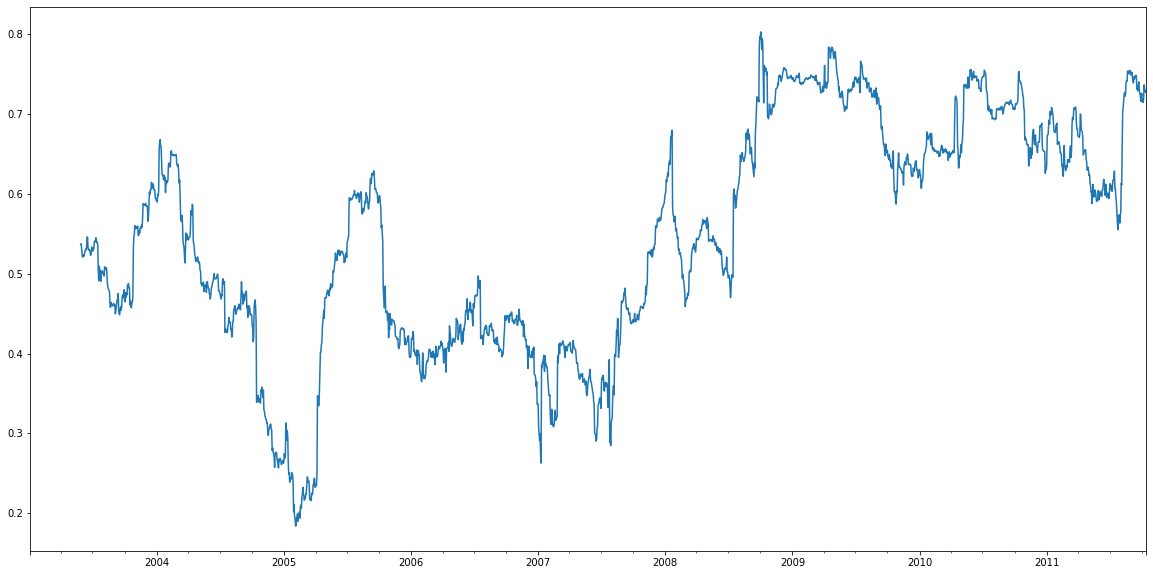

In [213]:
"""
有些统计运算（如相关系数和协方差）需要在两个时间序列上执行。
例如，金融分析师常常对某只股票对某个参考指数（如标准普尔500指数）的相关系数感兴趣。
要进行说明，我们先计算我们感兴趣的时间序列的百分数变化：
"""
fig = plt.figure(figsize=[20,10])
spx_px = close_px_all['SPX']
spx_rets = spx_px.pct_change() # 计算变化百分比
returns = close_px.pct_change()

corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

<AxesSubplot:>

<Figure size 1440x720 with 0 Axes>

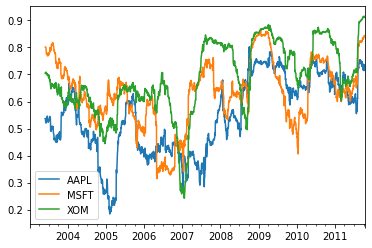

In [216]:
fig = plt.figure(figsize=[20,10])
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

#### *7.3 用户定义的移动窗口函数*

<AxesSubplot:>

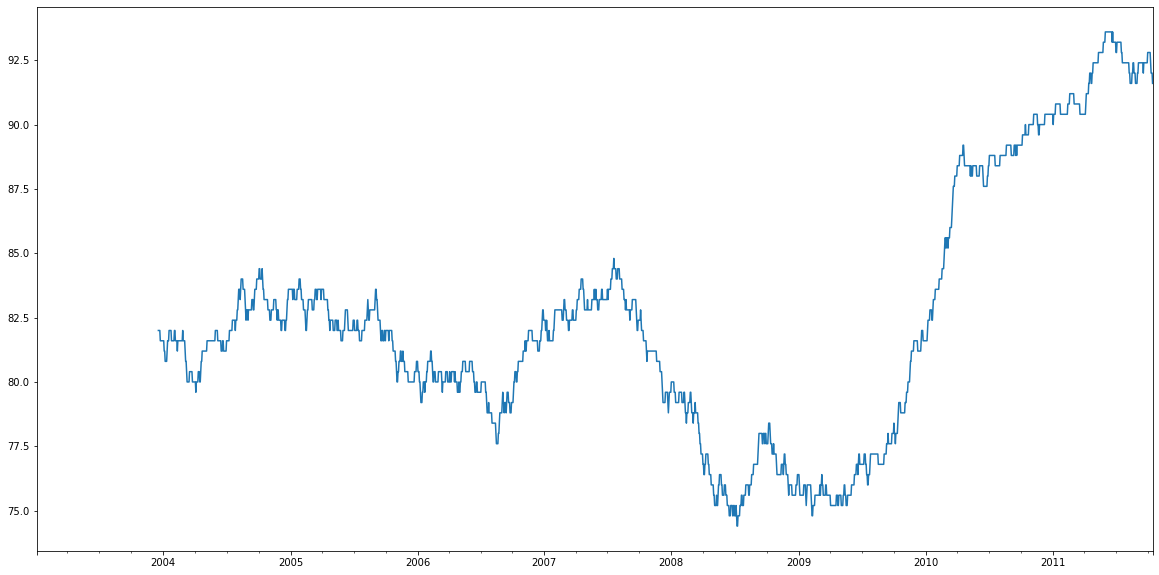

In [217]:
"""
rolling_apply函数使你能够在移动窗口上应用自己设计的数组函数。
唯一要求的就是：该函数要能从数组的各个片段中产生单个值（即约简）。
比如说，当我们用rolling(...).quantile(q)计算样本分位数时，
可能对样本中特定值的百分等级感兴趣。
scipy.stats.percentileofscore函数就能达到这个目的（结果见图11-10）：
"""
fig = plt.figure(figsize=[20,10])
from scipy.stats import percentileofscore
score_at_2percent = lambda x: percentileofscore(x, 0.02)
result = returns.AAPL.rolling(250).apply(score_at_2percent)
result.plot()

### *八、时间序列预测*
https://zhuanlan.zhihu.com/p/472739821  
```
AR：自回归
MA：平均移动
I：差分整合
S：季节性
V：向量（多维输入）
X：外生变量
```

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings("ignore") 

plt.rcParams["font.family"]="Kaiti"
matplotlib.rcParams['axes.unicode_minus'] = False 
plt.style.use('ggplot')
#sns.set_style('darkgrid')
#sns.set(font="Kaiti")

import matplotlib as mpl
from cycler import cycler
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linestyle'] = '-'

自回归 (AR)

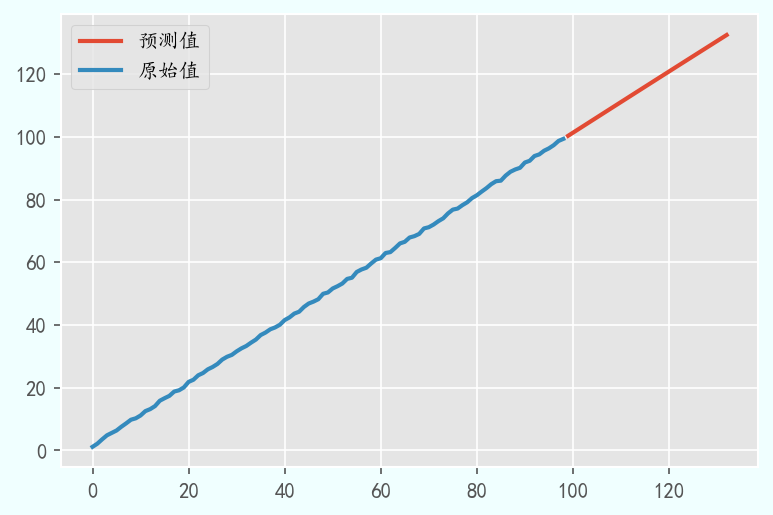

In [71]:
from cProfile import label
from statsmodels.tsa.ar_model import AutoReg 
from random import random 
# contrived dataset 
data_x = range(1, 100)
data = [i + random() for i in data_x] 
# fit model 
model = AutoReg(data, lags=1) 
model_fit = model.fit() 
# make prediction 
y_pred = model_fit.predict(start= len(data), end=len(data)+len(data)//3)

fig=plt.figure(num=1,figsize=(6,4),dpi=150,facecolor='#F0FFFF')
sns.lineplot(x=range(len(data),len(data)+len(y_pred)), y=y_pred,label='预测值')
sns.lineplot(x=range(0,len(data)), y=data,label='原始值')
plt.legend()

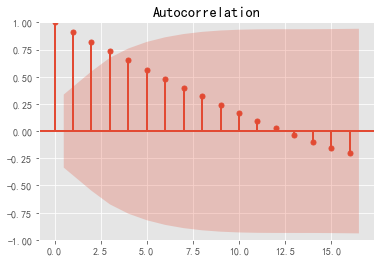

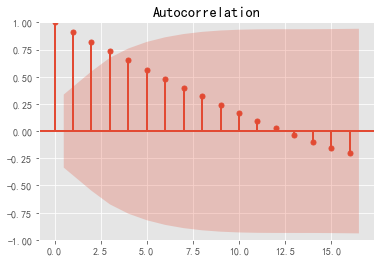

In [78]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(y_pred)

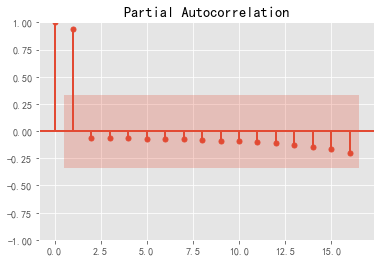

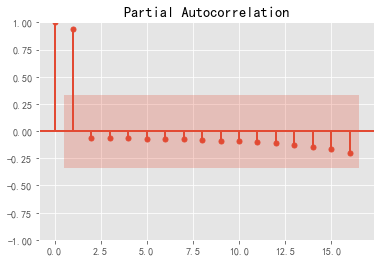

In [79]:
plot_pacf(y_pred)

移动平均模型(MA)

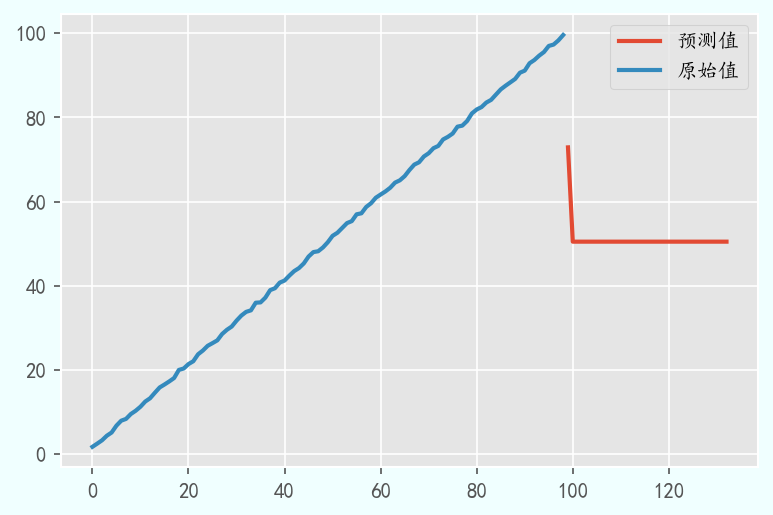

In [64]:
# MA example 
from statsmodels.tsa.arima.model import ARIMA 
from random import random 
# contrived dataset 
data = [x + random() for x in range(1, 100)] 
# fit model 
model = ARIMA(data, order=(0, 0, 1)) 
model_fit = model.fit() 
# make prediction 
yhat = model_fit.predict(len(data), len(data)+len(data)//3) 

fig=plt.figure(num=1,figsize=(6,4),dpi=150,facecolor='#F0FFFF')
sns.lineplot(x=range(len(data),len(data)+len(yhat)), y=yhat,label='预测值')
sns.lineplot(x=range(0,len(data)), y=data,label='原始值')
plt.legend()

自回归滑动平均模型 (ARMA)

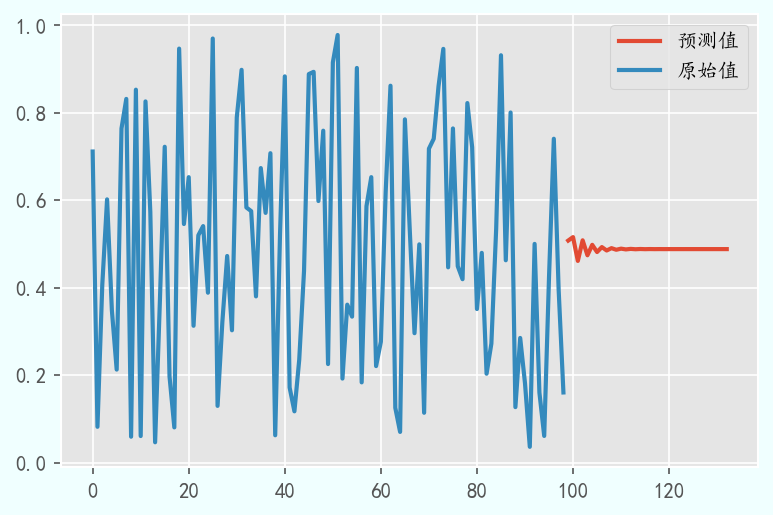

In [66]:
# ARMA example 
from statsmodels.tsa.arima.model import ARIMA 
from random import random 
# contrived dataset 
data = [random() for x in range(1, 100)] 
# fit model 
model = ARIMA(data, order=(2, 0, 1)) 
model_fit = model.fit() 
# make prediction 
yhat = model_fit.predict(len(data), len(data)+len(data)//3) 
fig=plt.figure(num=1,figsize=(6,4),dpi=150,facecolor='#F0FFFF')
sns.lineplot(x=range(len(data),len(data)+len(yhat)), y=yhat,label='预测值')
sns.lineplot(x=range(0,len(data)), y=data,label='原始值')
plt.legend()

差分整合移动平均自回归模型 (ARIMA)

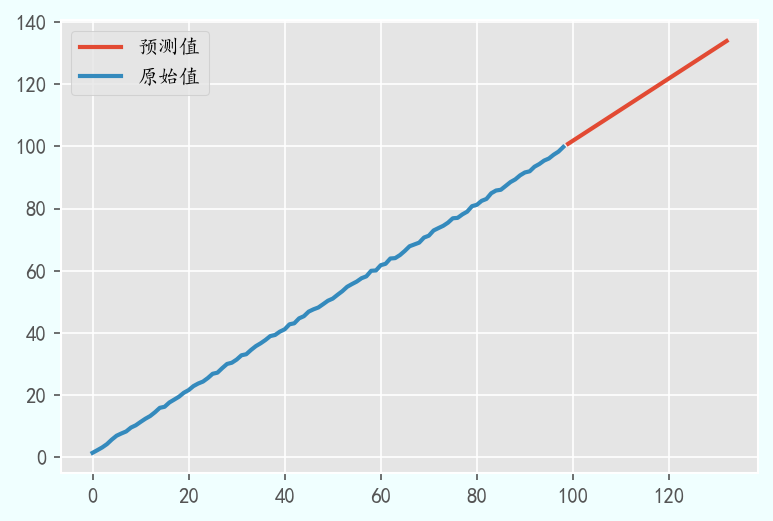

In [67]:
# ARIMA example 
from statsmodels.tsa.arima.model import ARIMA 
from random import random 
# contrived dataset 
data = [x + random() for x in range(1, 100)] 
# fit model 
model = ARIMA(data, order=(1, 1, 1)) 
model_fit = model.fit() 
# make prediction 
yhat = model_fit.predict(len(data), len(data)+len(data)//3, typ='levels') 
fig=plt.figure(num=1,figsize=(6,4),dpi=150,facecolor='#F0FFFF')
sns.lineplot(x=range(len(data),len(data)+len(yhat)), y=yhat,label='预测值')
sns.lineplot(x=range(0,len(data)), y=data,label='原始值')
plt.legend()

季节性 ARIMA (SARIMA)

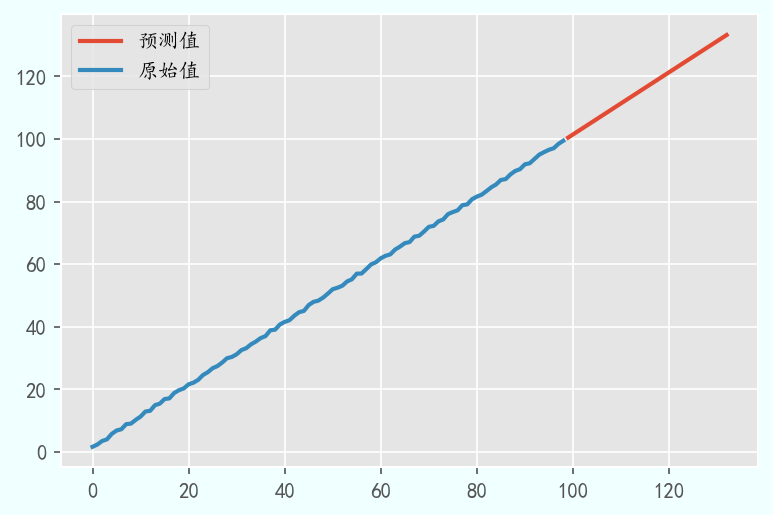

In [68]:
# SARIMA example 
from statsmodels.tsa.statespace.sarimax import SARIMAX 
from random import random 
# contrived dataset 
data = [x + random() for x in range(1, 100)] 
# fit model 
model = SARIMAX(data, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0)) 
model_fit = model.fit(disp=False) 
# make prediction 
yhat = model_fit.predict(len(data), len(data)+ len(data)//3) 
fig=plt.figure(num=1,figsize=(6,4),dpi=150,facecolor='#F0FFFF')
sns.lineplot(x=range(len(data),len(data)+len(yhat)), y=yhat,label='预测值')
sns.lineplot(x=range(0,len(data)), y=data,label='原始值')
plt.legend()

包含外生变量的SARIMA (SARIMAX)

In [ ]:
# SARIMAX example 
from statsmodels.tsa.statespace.sarimax import SARIMAX 
from random import random 
# contrived dataset 
data1 = [x + random() for x in range(1, 100)] 
data2 = [x + random() for x in range(101, 200)] 
# fit model 
model = SARIMAX(data1, exog=data2, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0)) 
model_fit = model.fit(disp=False) 
# make prediction 
exog2 = [200 + random()] 
yhat = model_fit.predict(len(data1), len(data1)+len(data1)//3, exog=[exog2]) 
sns.lineplot(x=range(len(data),len(data)+len(yhat)), y=yhat,label='预测值')
sns.lineplot(x=range(0,len(data)), y=data,label='原始值')
plt.legend()

向量自回归 (VAR)

In [ ]:
# VAR example 
from statsmodels.tsa.vector_ar.var_model import VAR 
from random import random 
# contrived dataset with dependency 
data = list() 
for i in range(100): 
    v1 = i + random() 
    v2 = v1 + random() 
    row = [v1, v2] 
    data.append(row) 
# fit model 
model = VAR(data) 
model_fit = model.fit() 
# make prediction 
yhat = model_fit.forecast(model_fit.y, steps=1) 
print(yhat)

向量自回归滑动平均模型 (VARMA)

In [ ]:
# VARMAX example 
from statsmodels.tsa.statespace.varmax import VARMAX 
from random import random 
# contrived dataset with dependency 
data = list() 
for i in range(100): 
    v1 = random() 
    v2 = v1 + random() 
    row = [v1, v2] 
    data.append(row) 
data_exog = [x + random() for x in range(100)] 
# fit model 
model = VARMAX(data, exog=data_exog, order=(1, 1)) 
model_fit = model.fit(disp=False) 
# make prediction 
data_exog2 = [[100]] 
yhat = model_fit.forecast(exog=data_exog2) 
print(yhat)

包含外生变量的向量自回归滑动平均模型 (VARMAX)

In [ ]:
# VARMAX example 
from statsmodels.tsa.statespace.varmax import VARMAX 
from random import random 
# contrived dataset with dependency 
data = list() 
for i in range(100): 
    v1 = random() 
    v2 = v1 + random() 
    row = [v1, v2] 
    data.append(row) 
data_exog = [x + random() for x in range(100)] 
# fit model 
model = VARMAX(data, exog=data_exog, order=(1, 1)) 
model_fit = model.fit(disp=False) 
# make prediction 
data_exog2 = [[100]] 
yhat = model_fit.forecast(exog=data_exog2) 
print(yhat)

### *九、Auto ARIMA*

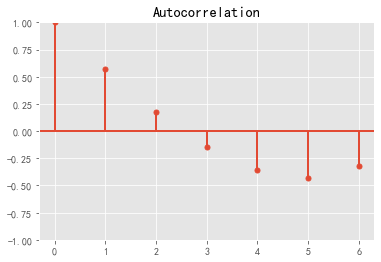

In [82]:
import pmdarima as pm

# Create an array like you would in R
x = pm.c(1, 2, 3, 4, 5, 6, 7)

# Compute an auto-correlation like you would in R:
pm.acf(x)

# Plot an auto-correlation:
pm.plot_acf(x)

In [ ]:
#!usr/bin/env python
# !usr/bin/env python
# -*- coding:utf-8 _*-
"""
@author: liujie
@software: PyCharm
@file: auto_arima.py
@time: 2020/11/7 21:27
"""
# 一次性预测多个值
'''
# 文档部分参考:http://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html?highlight=auto_arima
ARIMA是一个非常强大的时间序列预测模型，但是数据准备与参数调整过程非常耗时
Auto ARIMA让整个任务变得非常简单，舍去了序列平稳化，确定d值，创建ACF值和PACF图，确定p值和q值的过程

Auto ARIMA的步骤:
    1.加载数据并进行数据处理，修改成时间索引
    2.预处理数据:输入的应该是单变量，因此需要删除其他列
    3.拟合Auto ARIMA，在单变量序列上拟合模型
    4.在验证集上进行预测
    5.计算RMSE:用验证集上的预测值和实际值检查RMSE值
    
Auto-ARIMA通过进行差分测试,来确定差分d的顺序，然后在定义的start_p、max_p、start_q、max_q范围内拟合模型。
如果季节可选选项被启用，auto-ARIMA还会在进行Canova-Hansen测试以确定季节差分的最优顺序D后，寻找最优的P和Q超参数。
为了找到最好的模型,给定information_criterion auto-ARIMA优化,(‘aic’,‘aicc’,‘bic’,‘hqic’,‘oob’)
并返回ARIMA的最小值。
注意，由于平稳性问题，auto-ARIMA可能无法找到合适的收敛模型。如果是这种情况，将抛出一个ValueError，
建议在重新拟合之前使数据变稳定，或者选择一个新的顺序值范围。
非逐步的(也就是网格搜索)选择可能会很慢，特别是对于季节性数据。Hyndman和Khandakar(2008)中概述了逐步算法。
'''
import warnings
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime
from math import sqrt
from sklearn.metrics import mean_squared_error
from pmdarima.arima import auto_arima


def main():
    warnings.filterwarnings(action='ignore')
    # 第一步:加载数据
    # 定义将字符串时间转化成日期时间数组
    date_parser = lambda dates: datetime.strptime(dates, '%Y/%m/%d')
    data = pd.read_csv('../data/Data.csv', header=0, parse_dates=['month'], date_parser=date_parser, index_col='month')
    data.fillna(method='pad', inplace=True)
    # print(data.head(5))
    # print(data.index)
    # print(data.dtypes)

    # 第二步：预处理数据-由于所给数据本身就是单变量序列，并且没有空值，因此，可以不进行这一步处理
    # 将数据分成训练集与验证集
    val_size = 100
    train_size = 10 * val_size
    train, val = data[-(train_size + val_size):-val_size + 1]['data'], data[-val_size:]['data']
    # plot the data
    fig = plt.figure()
    fig.add_subplot()
    plt.plot(train, 'r-', label='train_data')
    plt.plot(val, 'y-', label='val_data')
    plt.legend(loc='best')
    plt.show(block=False)

    # 第三步:buliding the model
    # 仅需要fit命令来拟合模型,而不必要选择p、d、q的组合，模型会生成AIC值和BIC值，以确定参数的最佳组合
    # AIC和 BIC是用于比较模型的评估器，这些值越低，模型就越好
    '''
    网址:http://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html?highlight=auto_arima
    auto_arima部分参数解析(季节性参数未写):
        1.start_p:p的起始值，自回归(“AR”)模型的阶数(或滞后时间的数量),必须是正整数
        2.start_q:q的初始值，移动平均(MA)模型的阶数。必须是正整数。
        3.max_p:p的最大值，必须是大于或等于start_p的正整数。
        4.max_q:q的最大值，必须是一个大于start_q的正整数
        5.seasonal:是否适合季节性ARIMA。默认是正确的。注意，如果season为真，而m == 1，则season将设置为False。
        6.stationary :时间序列是否平稳，d是否为零。
        6.information_criterion：信息准则用于选择最佳的ARIMA模型。(‘aic’，‘bic’，‘hqic’，‘oob’)之一
        7.alpha：检验水平的检验显著性，默认0.05
        8.test:如果stationary为假且d为None，用来检测平稳性的单位根检验的类型。默认为‘kpss’;可设置为adf
        9.n_jobs ：网格搜索中并行拟合的模型数(逐步=False)。默认值是1，但是-1可以用来表示“尽可能多”。
        10.suppress_warnings：statsmodel中可能会抛出许多警告。如果suppress_warnings为真，那么来自ARIMA的所有警告都将被压制
        11.error_action:如果由于某种原因无法匹配ARIMA，则可以控制错误处理行为。(warn,raise,ignore,trace)
        12.max_d:d的最大值，即非季节差异的最大数量。必须是大于或等于d的正整数。
        13.trace:是否打印适合的状态。如果值为False，则不会打印任何调试信息。值为真会打印一些
    '''
    model = auto_arima(train, start_p=0, start_q=0, max_p=6, max_q=6, max_d=2,
                       seasonal=True, test='adf',
                       error_action='ignore',
                       information_criterion='aic',
                       njob=-1, trace=True, suppress_warnings=True)
    model.fit(train)

    # 第四步:在验证集上进行预测
    forecast = model.predict(n_periods=len(val))
    print(forecast)
    forecast = pd.DataFrame(forecast, index=val.index, columns=['prediction'])

    # calculate rmse
    rmse = np.sqrt(mean_squared_error(val, forecast))
    print('RMSE : %.4f' % rmse)

    # plot predictions
    fig = plt.figure()
    fig.add_subplot()
    plt.plot(train, 'r-', label='train')
    plt.plot(val, 'y-', label='val')
    plt.plot(forecast, 'b-', label='prediction')
    plt.legend(loc='best')
    plt.title('RMSE : %.4f' % rmse)
    plt.show(block=False)


if __name__ == '__main__':
    main()



> 滚动预测

In [ ]:
#!usr/bin/env python
# !usr/bin/env python
# -*- coding:utf-8 _*-
"""
@author: liujie
@software: PyCharm
@file: auto_arima.py
@time: 2020/11/8 14:29
"""
# 滚动预测-滚动窗口大小为120，预测个数为100
'''
# 文档部分参考:http://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html?highlight=auto_arima
ARIMA是一个非常强大的时间序列预测模型，但是数据准备与参数调整过程非常耗时
Auto ARIMA让整个任务变得非常简单，舍去了序列平稳化，确定d值，创建ACF值和PACF图，确定p值和q值的过程

Auto ARIMA的步骤:
    1.加载数据并进行数据处理，修改成时间索引
    2.预处理数据:输入的应该是单变量，因此需要删除其他列
    3.拟合Auto ARIMA，在单变量序列上拟合模型
    4.在验证集上进行预测
    5.计算RMSE:用验证集上的预测值和实际值检查RMSE值

Auto-ARIMA通过进行差分测试,来确定差分d的顺序，然后在定义的start_p、max_p、start_q、max_q范围内拟合模型。
如果季节可选选项被启用，auto-ARIMA还会在进行Canova-Hansen测试以确定季节差分的最优顺序D后，寻找最优的P和Q超参数。
为了找到最好的模型,给定information_criterion auto-ARIMA优化,(‘aic’,‘aicc’,‘bic’,‘hqic’,‘oob’)
并返回ARIMA的最小值。
注意，由于平稳性问题，auto-ARIMA可能无法找到合适的收敛模型。如果是这种情况，将抛出一个ValueError，
建议在重新拟合之前使数据变稳定，或者选择一个新的顺序值范围。
非逐步的(也就是网格搜索)选择可能会很慢，特别是对于季节性数据。Hyndman和Khandakar(2008)中概述了逐步算法。
'''
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.metrics import mean_squared_error
from pmdarima.arima import auto_arima

# 生成一个路径
def generpath(path):
    if not os.path.exists(path):
        os.makedirs(path)

# 生成文件
def generfile(path,filename,m):
    if not os.path.exists(path+filename):
        order = [x for x in range(1,m+1)]
        dataframe = pd.DataFrame({"order":order})
        dataframe.to_csv(path+filename,sep=',')     # 将对象写入文件中

# 生成数据
def datasave(savepath,saveindex,y_test_pre):
    sdata =pd.read_csv(savepath)
    sdata= pd.DataFrame(sdata)
    y_test_pre = np.array(y_test_pre)
    sdata[saveindex] = y_test_pre
    sdata.to_csv(savepath,index = False)

def main():
    # 加载数据
    # 定义将字符串时间转化成日期时间数组
    date_parser = lambda dates: datetime.strptime(dates, '%Y/%m/%d')
    data = pd.read_csv('../data/Data.csv', header=0, parse_dates=['month'], date_parser=date_parser, index_col='month')
    data.fillna(method='pad', inplace=True)
    # print(data.head(5))
    # print(data.index)
    # print(data.dtypes)

    # 预处理数据-由于所给数据本身就是单变量序列，并且没有空值，因此，可以不进行这一步处理

    # 设置滚动预测的参数
    columns = 'data'
    ts = data[columns]
    test_size = 100  # 需要预测的个数
    rolling_size = 120  # 滚动窗口大小
    ps = 1  # 每次预测的个数
    horizon = 1  # 用来消除切片的影响
    pre = []  # 存放预测值
    test = ts[-test_size:]

    # 滚动预测
    for i in range(test_size):
        print(i)
        train = ts[-(rolling_size + test_size - i):-(test_size + horizon - i)]
        model = auto_arima(train, start_p=0, start_q=0, max_p=6, max_q=6, max_d=2,
                           seasonal=True, test='adf',
                           error_action='ignore',
                           information_criterion='aic',
                           njob=-1, suppress_warnings=True)
        model.fit(train)
        forecast = model.predict(n_periods=ps)
        pre.append(forecast[-1])


    predictions_ = pd.Series(pre,index=test.index)
    # print(predictions)

    # 计算RMSE
    rmse = np.sqrt(mean_squared_error(predictions_, test))

    # 画图
    fig = plt.figure()
    fig.add_subplot()
    plt.plot(test, 'r-', label='test')
    plt.plot(predictions_, 'b-', label='predictions')
    plt.title('RMSE : %.4f' % rmse)
    plt.legend(loc='best')
    plt.show(block=False)

    predictions = np.array(pre).reshape(-1,1)
    test = np.array(test[:len(predictions)].values).reshape(-1,1)
    # 保存模型
    savepath = "predata/AUTO-ARIMA/"
    filename = "AUTO-ARIMA预测.csv"

    saveindex = columns + "_" + "day" + str(horizon)
    generpath(savepath)
    generfile(savepath, filename, len(predictions))
    datasave(savepath + filename, "y_true", test)
    datasave(savepath + filename, saveindex, predictions)


if __name__ == '__main__':
    main()



In [3]:
print(__doc__)

# Author: Taylor Smith <taylor.smith@alkaline-ml.com>

import numpy as np
import pmdarima as pm
from pmdarima import model_selection

print("pmdarima version: %s" % pm.__version__)

# Load the data and split it into separate pieces
data = pm.datasets.load_wineind()
train, test = model_selection.train_test_split(data, train_size=165)

# Even though we have a dedicated train/test split, we can (and should) still
# use cross-validation on our training set to get a good estimate of the model
# performance. We can choose which model is better based on how it performs
# over various folds.
model1 = pm.ARIMA(order=(2, 1, 1))
model2 = pm.ARIMA(order=(1, 1, 2),
                  seasonal_order=(0, 1, 1, 12),
                  suppress_warnings=True)
cv = model_selection.SlidingWindowForecastCV(window_size=100, step=24, h=1)

model1_cv_scores = model_selection.cross_val_score(
    model1, train, scoring='smape', cv=cv, verbose=2)

model2_cv_scores = model_selection.cross_val_score(
    model2, train, scoring='smape', cv=cv, verbose=2)

print("Model 1 CV scores: {}".format(model1_cv_scores.mean().tolist()))
print("Model 2 CV scores: {}".format(model2_cv_scores.mean().tolist()))

# Pick based on which has a lower mean error rate
m1_average_error = np.average(model1_cv_scores)
m2_average_error = np.average(model2_cv_scores)
errors = [m1_average_error, m2_average_error]
models = [model1, model2]

# print out the answer
better_index = np.argmin(errors)  # type: int
print("Lowest average SMAPE: {} (model{})".format(
    errors[better_index], better_index + 1))
print("Best model: {}".format(models[better_index]))

Automatically created module for IPython interactive environment
pmdarima version: 1.8.5
[CV] fold=0 ..........................................................
[CV] fold=1 ..........................................................
[CV] fold=2 ..........................................................
[CV] fold=0 ..........................................................
[CV] fold=1 ..........................................................
[CV] fold=2 ..........................................................
Model 1 CV scores: 16.65568403410846
Model 2 CV scores: 7.4713873840488025
Lowest average SMAPE: 7.4713873840488025 (model2)
Best model:  ARIMA(1,1,2)(0,1,1)[12] intercept


### *十、指数平滑法*

一次指数平滑

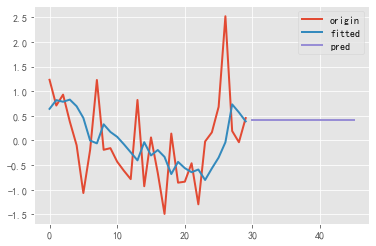

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#def ses():
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
number = 30
x1 = np.round(np.linspace(0, 1, number), 4)
y1 = pd.Series(np.multiply(x1, (x1 - 0.5)) + np.random.randn(number))
# fitted部分是直线或者是曲线，受到原始数据影响。
# 多次测试显示，直线的概率高。
# ets1 = SimpleExpSmoothing(endog=y1, initialization_method='estimated')
ets1 = SimpleExpSmoothing(endog=y1, initialization_method='heuristic')
r1 = ets1.fit()
pred1 = r1.predict(start=len(y1), end=len(y1) + len(y1)//2)

plot_data=pd.DataFrame({
    'origin': y1,
    'fitted': r1.fittedvalues,
    'pred': pred1
})
plot_data.plot()
plt.savefig('ses.png')

#ses()


二次指数平滑

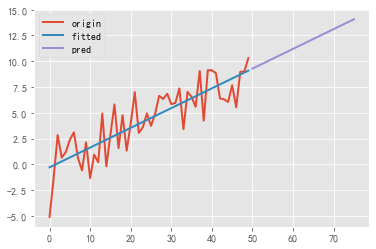

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def holt():
    from statsmodels.tsa.holtwinters import Holt
    number = 50
    x2 = np.round(np.linspace(0, 99, number))
    y2 = pd.Series(0.1 * x2 + 2 * np.random.randn(number))
    # fitted部分是直线或者是曲线，受到原始数据影响。
    # 多次测试显示，直线的概率高。
    ets2 = Holt(endog=y2, initialization_method='estimated')
    # ets2 = Holt(endog=y2, initialization_method='heuristic')
    # ets2 = Holt(endog=y2, initialization_method='estimated', damped_trend=True)
    r2 = ets2.fit()
    pred2 = r2.predict(start=len(y2), end=len(y2) + len(y2) // 2)

    pd.DataFrame({
        'origin': y2,
        'fitted': r2.fittedvalues,
        'pred': pred2
    }).plot(legend=True)
    plt.savefig('holt2.png')

holt()


三次指数平滑-引入了季节性

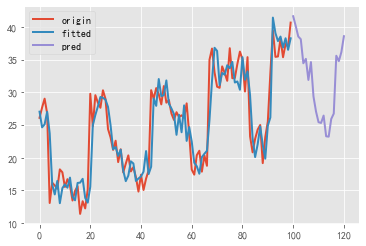

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def holtwinters():
    from statsmodels.tsa.holtwinters import ExponentialSmoothing
    number = 100
    x3 = np.round(np.linspace(0, 4 * np.pi, number))
    y3 = pd.Series(20 + 0.1 * np.multiply(x3, x3) + 8 * np.cos(2 * x3) + 2 * np.random.randn(number))
    # ets3 = ExponentialSmoothing(y3, trend='add', seasonal='add', seasonal_periods=25)
    # ets3 = ExponentialSmoothing(y3, trend='mul', seasonal='mul', seasonal_periods=25)
    ets3 = ExponentialSmoothing(y3, trend='mul', seasonal='mul', damped_trend=True, seasonal_periods=25)
    r3 = ets3.fit()
    #pred3 = r3.predict(start=len(y3), end=len(y3) + len(y3) // 2)
    pred3 = r3.predict(start=len(y3), end=len(y3) + len(y3) // 5)
    pd.DataFrame({
        'origin': y3,
        'fitted': r3.fittedvalues,
        'pred': pred3
    }).plot(legend=True)
    plt.savefig('holtwinters_mul_damped.png')
holtwinters()


### *十一、Prophet*

In [ ]:
# https://zhuanlan.zhihu.com/p/52330017

In [24]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings("ignore") 

plt.rcParams["font.family"]="Kaiti"
matplotlib.rcParams['axes.unicode_minus'] = False 
plt.style.use('ggplot')
#sns.set_style('darkgrid')
#sns.set(font="Kaiti")

import matplotlib as mpl
from cycler import cycler
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['lines.linestyle'] = '-'

In [12]:
from prophet import Prophet
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [37]:
df.tail()

,ds,y
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871
2904,2016-01-20,8.891374


In [16]:
df.shape

(2905, 2)

模型参数

In [26]:
m = Prophet(growth='linear',
            changepoints=None,
            n_changepoints=25, 
            changepoint_range=0.8,
            yearly_seasonality='auto',
            weekly_seasonality='auto',
            daily_seasonality='auto',
            holidays=None,
            seasonality_mode='additive',
            seasonality_prior_scale=10.0,
            holidays_prior_scale=10.0,
            changepoint_prior_scale=0.05,
            mcmc_samples=0,
            interval_width=0.80,
            uncertainty_samples=1000,
            )
m.fit(df)

22:55:10 - cmdstanpy - INFO - Chain [1] start processing
22:55:10 - cmdstanpy - INFO - Chain [1] done processing


In [27]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


预测

In [28]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.210268,7.459695,8.974857
3266,2017-01-16,8.535296,7.807073,9.299768
3267,2017-01-17,8.322712,7.538651,9.005602
3268,2017-01-18,8.155345,7.401669,8.957301
3269,2017-01-19,8.167304,7.427040,8.933657


画图

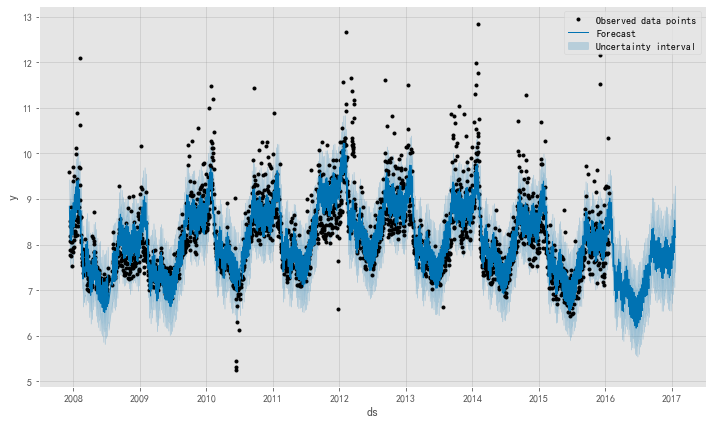

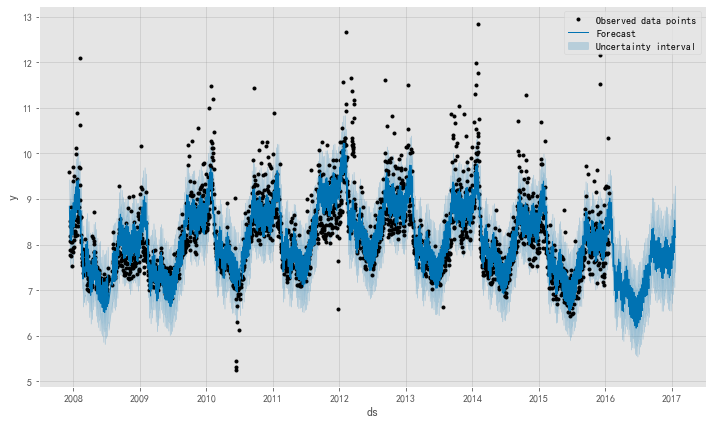

In [32]:
m.plot(forecast,include_legend=True)

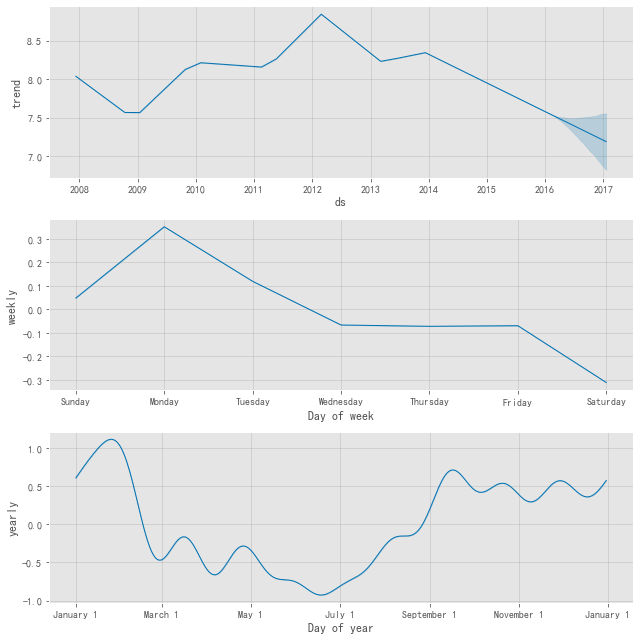

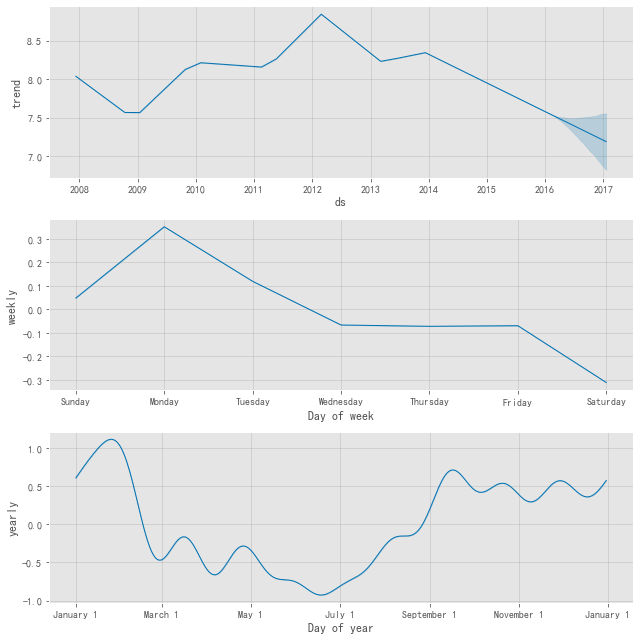

In [33]:
m.plot_components(forecast)

交互图

In [34]:
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m, forecast)

In [35]:
plot_components_plotly(m, forecast)